In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('emaildata.csv').drop('Unnamed: 0', axis=1)
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked
0,8,short_email,generic,9,Thursday,US,3,0
1,33,long_email,personalized,6,Monday,US,0,0
2,46,short_email,generic,14,Tuesday,US,3,0
3,49,long_email,personalized,11,Thursday,US,10,0
4,65,short_email,generic,8,Wednesday,UK,3,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99950 entries, 0 to 99949
Data columns (total 8 columns):
email_id               99950 non-null int64
email_text             99950 non-null object
email_version          99950 non-null object
hour                   99950 non-null int64
weekday                99950 non-null object
user_country           99950 non-null object
user_past_purchases    99950 non-null int64
clicked                99950 non-null int64
dtypes: int64(4), object(4)
memory usage: 6.1+ MB
None


In [4]:
df.describe()


,email_id,hour,user_past_purchases,clicked
count,99950.000000,99950.000000,99950.000000,99950.00000
mean,498695.729065,9.059100,3.878559,0.02070
std,289226.115244,4.439618,3.196324,0.14238
min,8.000000,1.000000,0.000000,0.00000
25%,246721.500000,6.000000,1.000000,0.00000
50%,498441.500000,9.000000,3.000000,0.00000
75%,749936.750000,12.000000,6.000000,0.00000
max,999998.000000,24.000000,22.000000,1.00000


In [5]:
df['clicked'].value_counts()

0    97881
1     2069
Name: clicked, dtype: int64

In [6]:
df['clicked'].value_counts(normalize=True)

0    0.9793
1    0.0207
Name: clicked, dtype: float64

In [7]:
pd.crosstab(df['clicked'], df['user_country'], normalize=True)

user_country,ES,FR,UK,US
clicked,,,,
0,0.098889,0.09920,0.194567,0.586643
1,0.000800,0.00074,0.004812,0.014347


In [8]:
pd.crosstab(df['clicked'], df['hour'], normalize=True)

hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
clicked,,,,,,,,,,,,,,,,,,,,,
0,0.026553,0.036178,0.045223,0.055338,0.064362,0.073407,0.080580,0.082431,0.083132,0.079530,...,0.034077,0.026963,0.018589,0.013987,0.008904,0.006483,0.003622,0.002001,0.001391,0.00067
1,0.000470,0.000580,0.000890,0.000890,0.001151,0.001241,0.001461,0.001581,0.002151,0.002261,...,0.000850,0.000610,0.000350,0.000230,0.000150,0.000080,0.000030,0.000030,0.000060,0.00002


In [9]:
pd.crosstab(df['clicked'], df['email_text'], normalize=True)

email_text,long_email,short_email
clicked,,
0,0.493687,0.485613
1,0.009045,0.011656


In [10]:
pd.crosstab(df['clicked'], df['weekday'], normalize=True)

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
clicked,,,,,,,
0,0.139850,0.140410,0.143162,0.141531,0.139350,0.137979,0.137019
1,0.001871,0.003242,0.002551,0.002281,0.003462,0.003462,0.003832


In [11]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

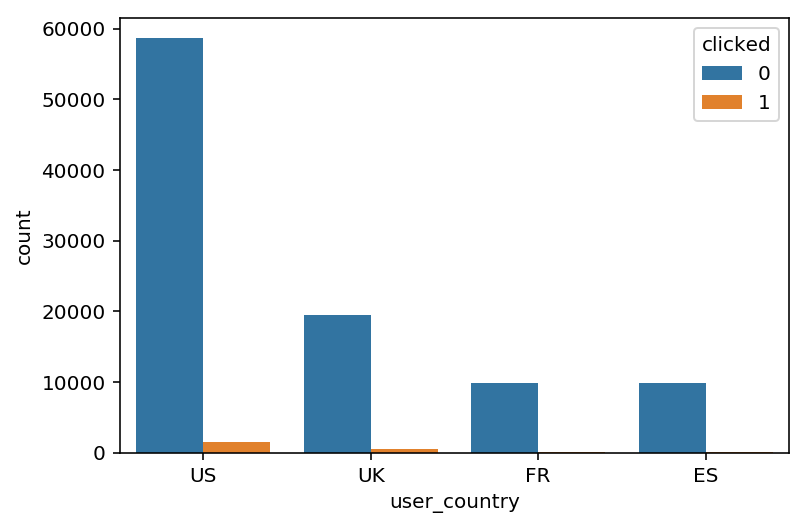

In [12]:
sns.countplot(x='user_country', hue='clicked', data=df)

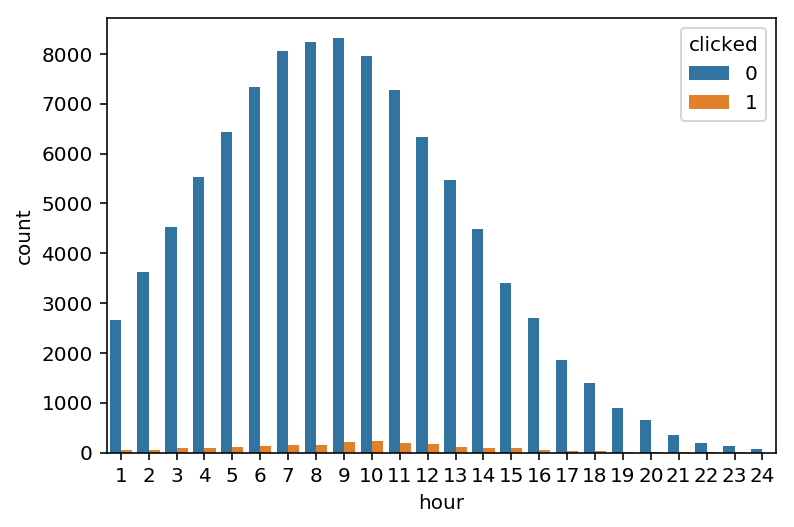

In [13]:
sns.countplot(x='hour', hue='clicked', data=df)

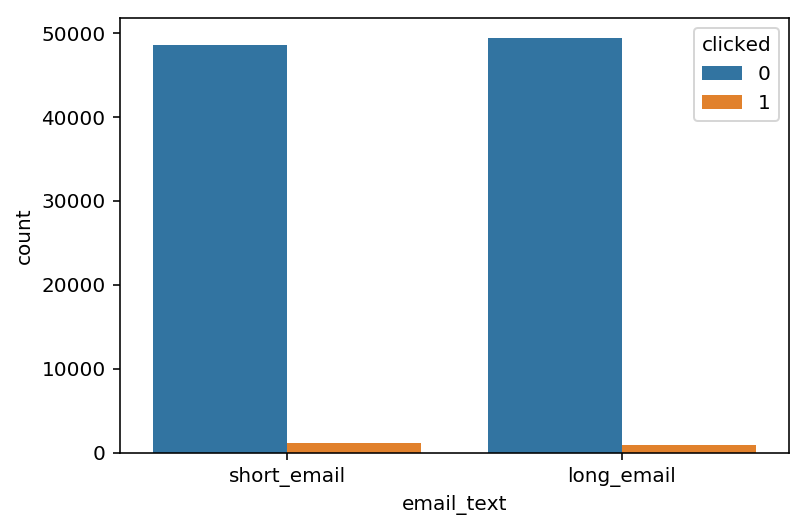

In [14]:
sns.countplot(x='email_text', hue='clicked', data=df)

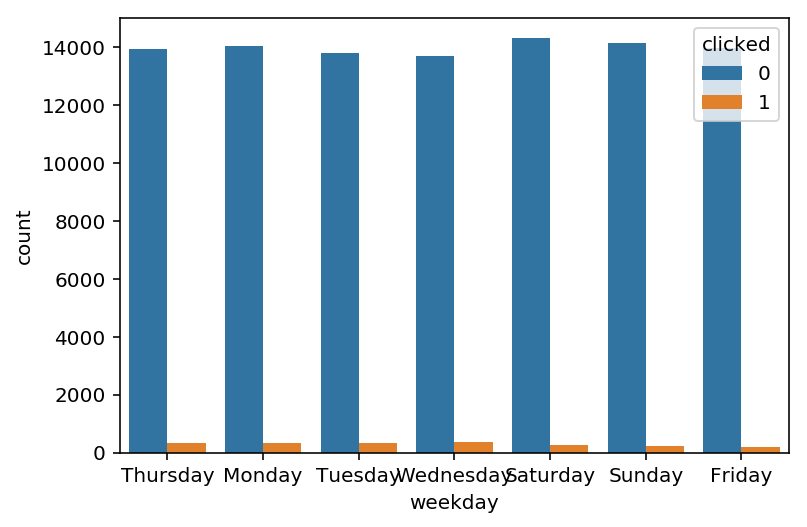

In [15]:
sns.countplot(x='weekday', hue='clicked', data=df)

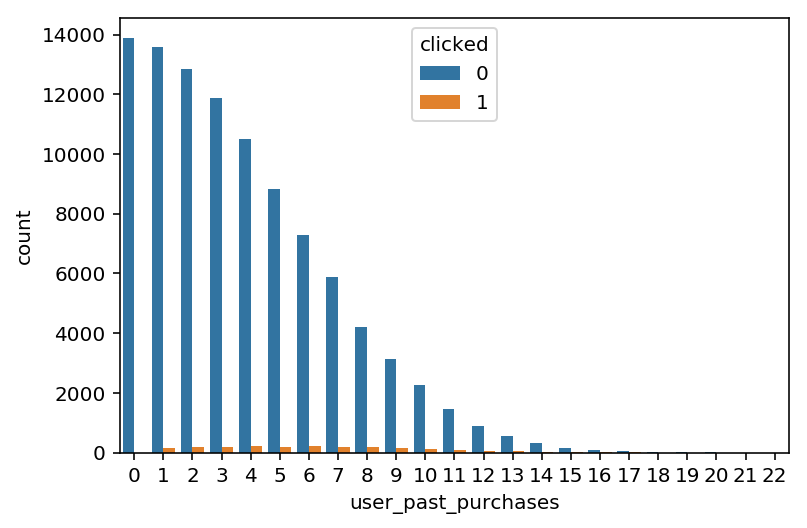

In [16]:
sns.countplot(x='user_past_purchases', hue='clicked', data=df)

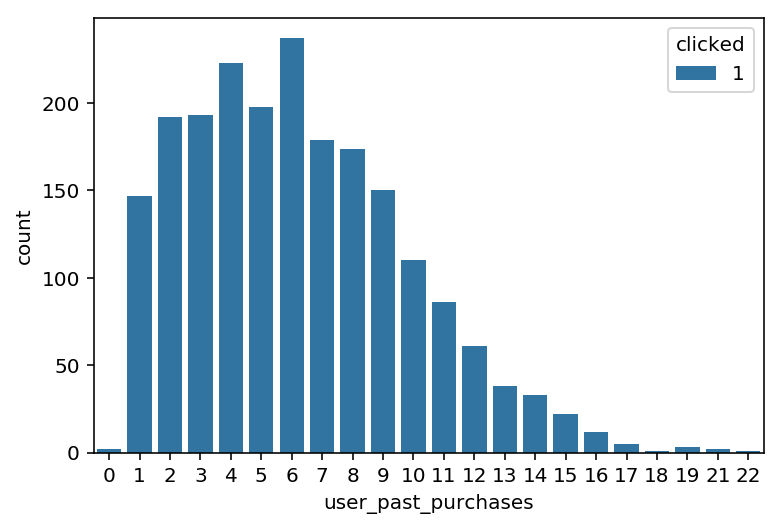

In [17]:
sns.countplot(x='user_past_purchases', hue='clicked', data=df[df['clicked'] == 1])

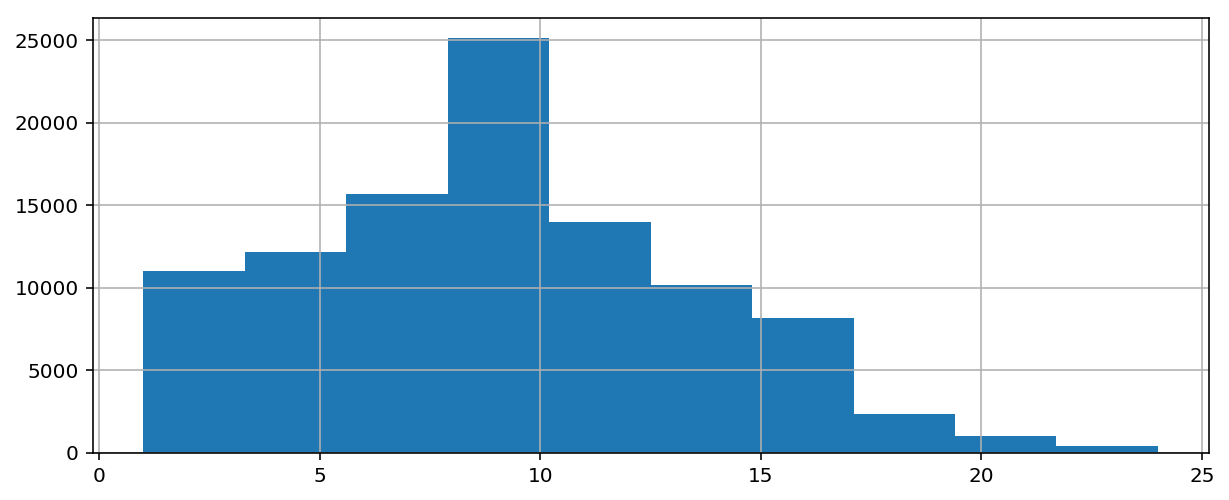

In [18]:
df['hour'].hist(figsize=(10, 4))

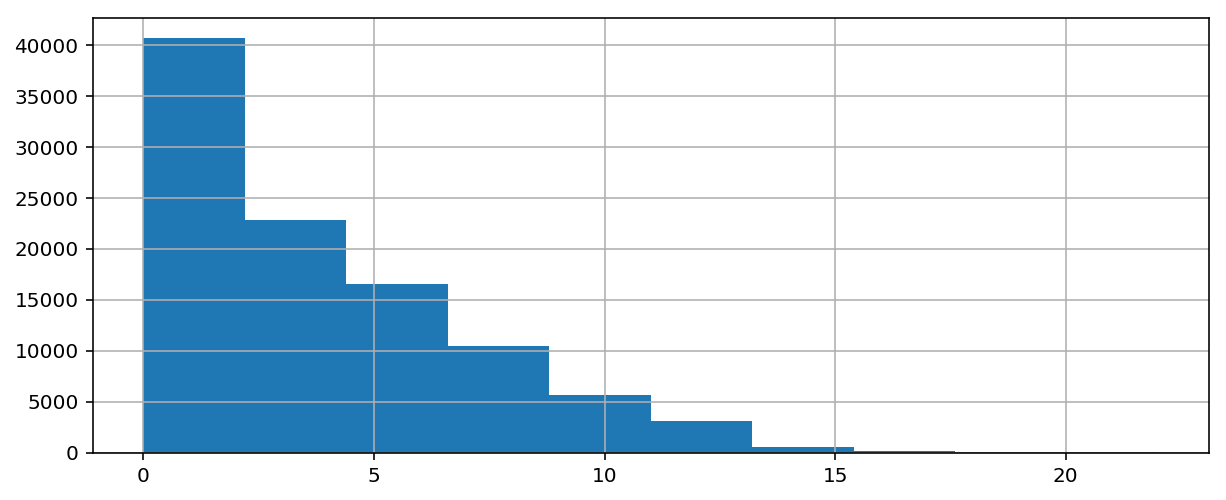

In [19]:
df['user_past_purchases'].hist(figsize=(10, 4))

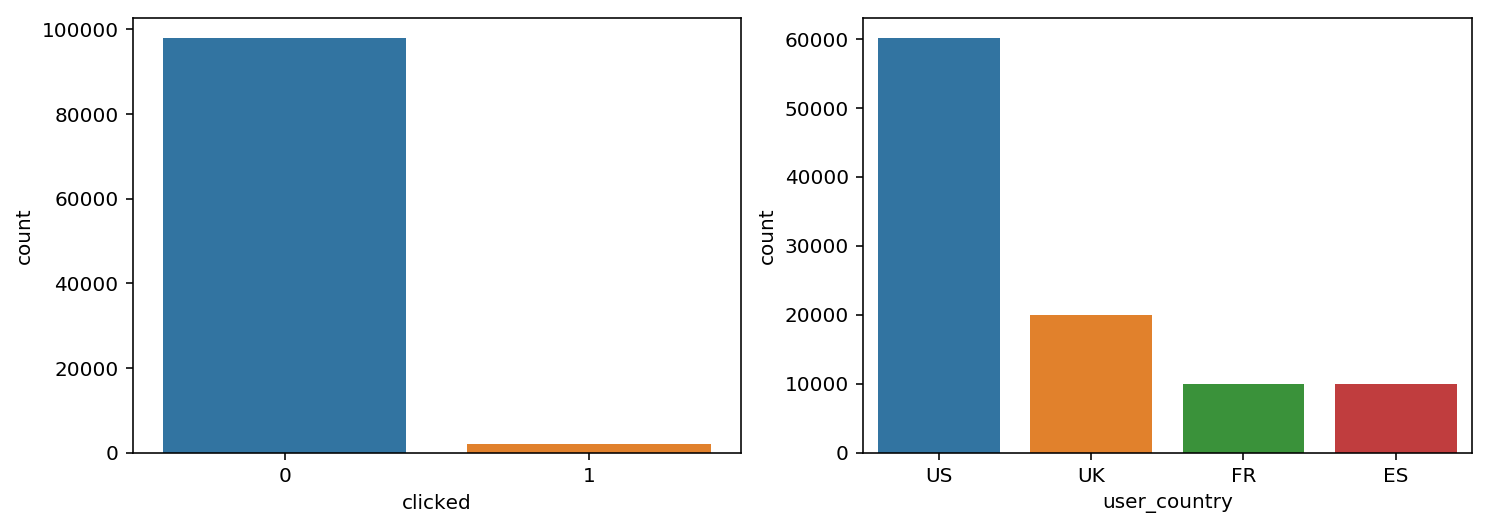

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='clicked', data=df, ax=axes[0]);
sns.countplot(x='user_country', data=df, ax=axes[1]);

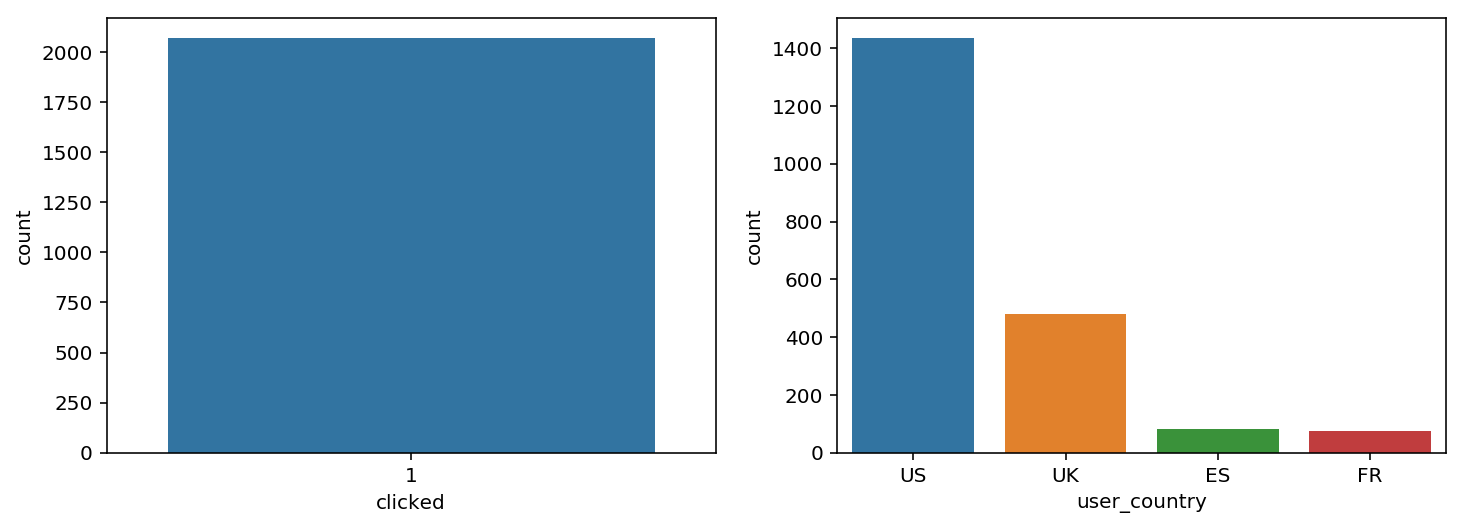

In [21]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='clicked', data=df[df['clicked']==1], ax=axes[0]);
sns.countplot(x='user_country', data=df[df['clicked']==1], ax=axes[1]);

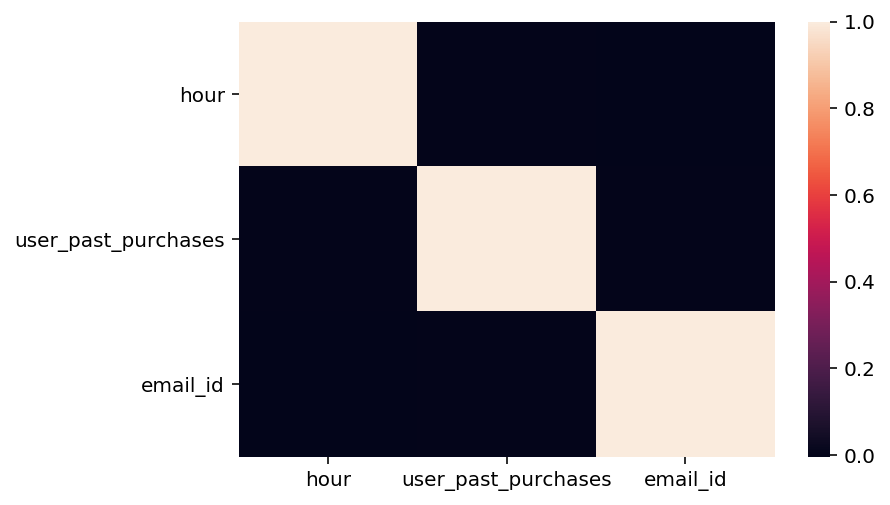

In [22]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['user_country', 'email_text', 'weekday', 'email_version', 'email_text', 'clicked']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

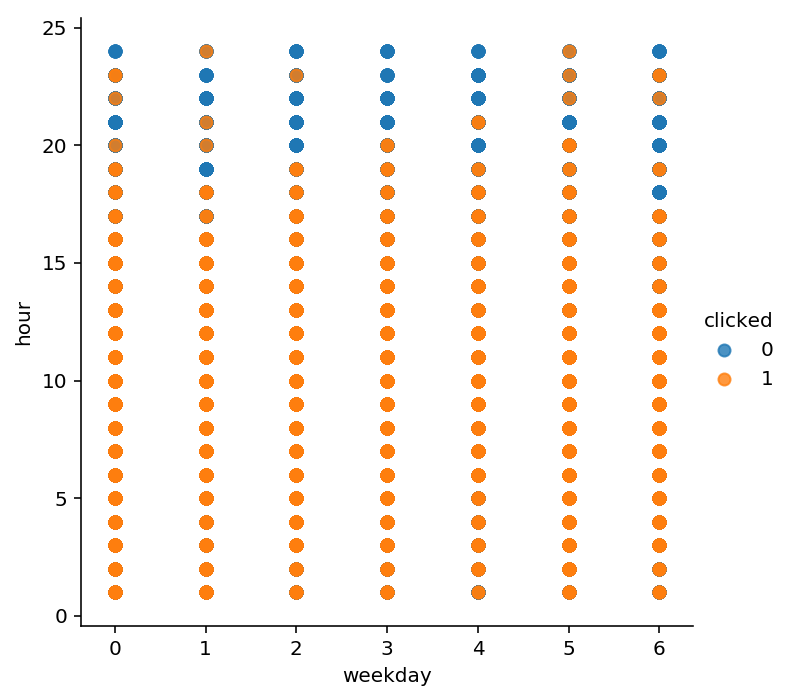

In [48]:
sns.lmplot('weekday', 'hour', data=df, hue='clicked', fit_reg=False);


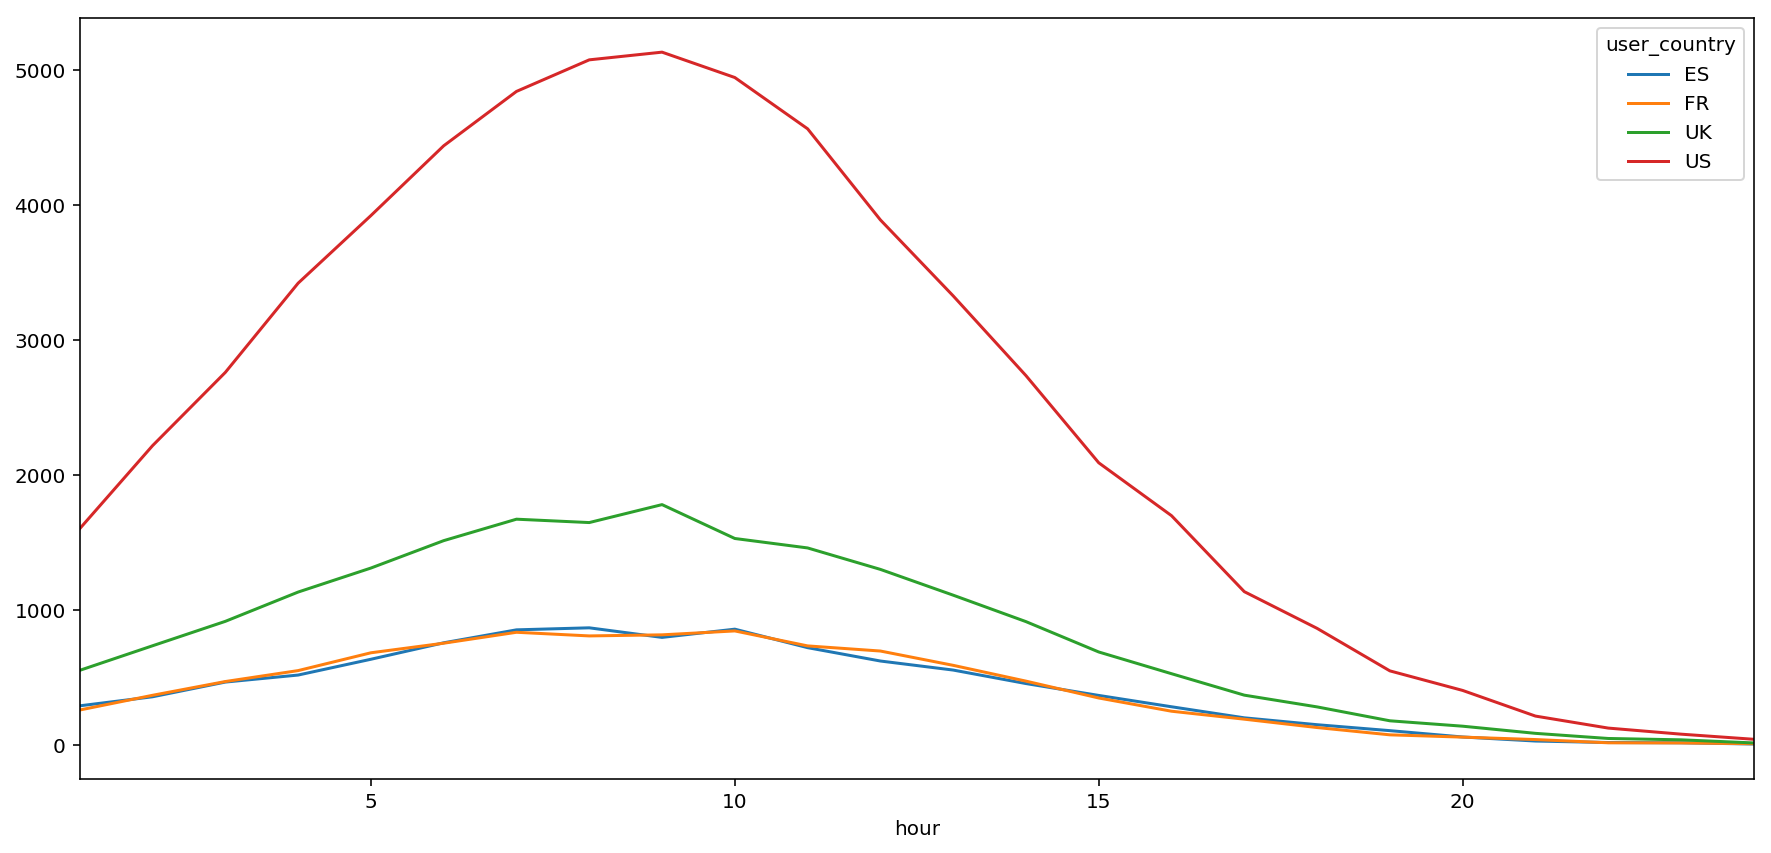

In [24]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['hour','user_country']).count()['email_id'].unstack().plot(ax=ax)

#We observe seasonality in overall demand

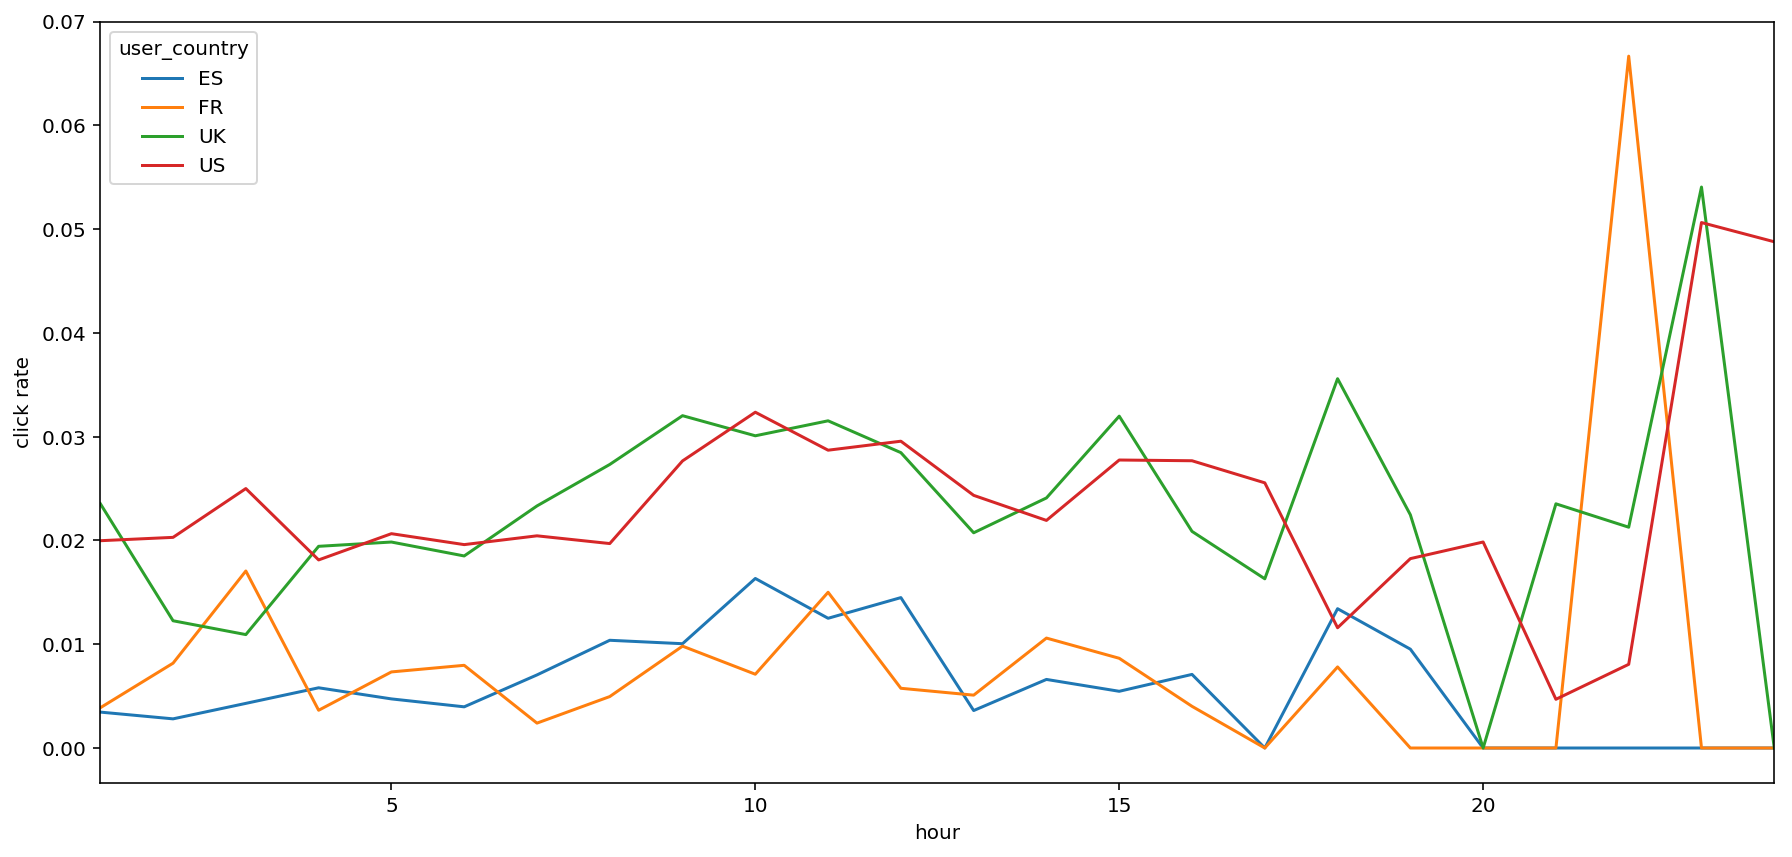

In [30]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('click rate')
# use unstack()
df.groupby(['hour','user_country']).mean()['clicked'].unstack().plot(ax=ax)

#We observe seasonality in overall demand

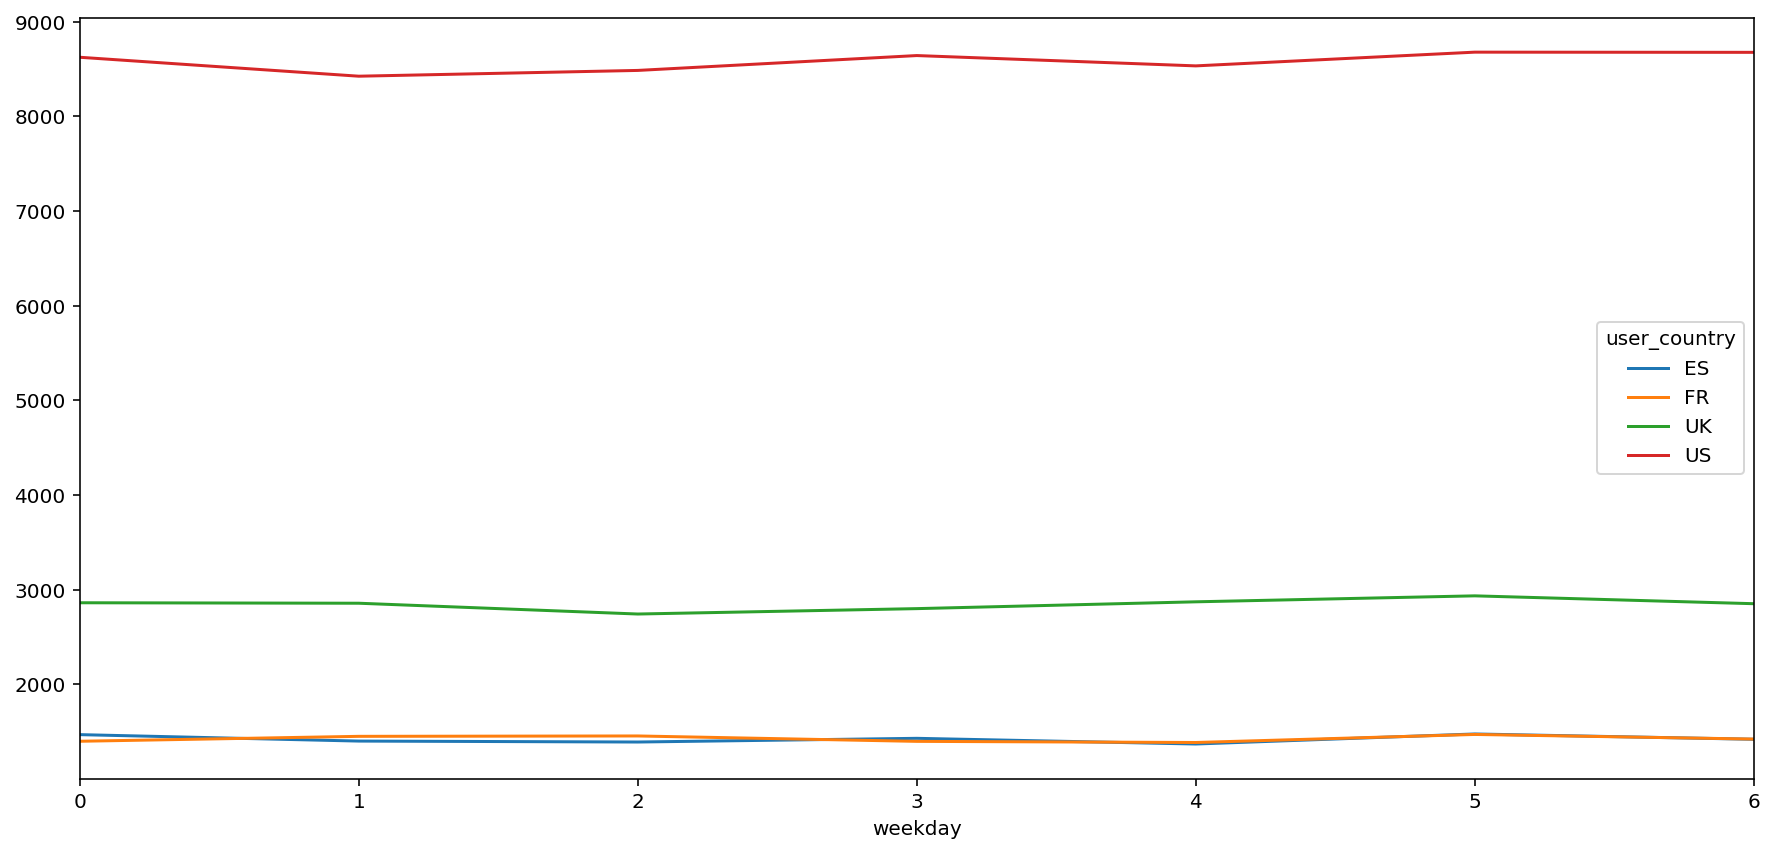

In [38]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['weekday','user_country']).count()['email_id'].unstack().plot(ax=ax)

#We observe seasonality in overall demand

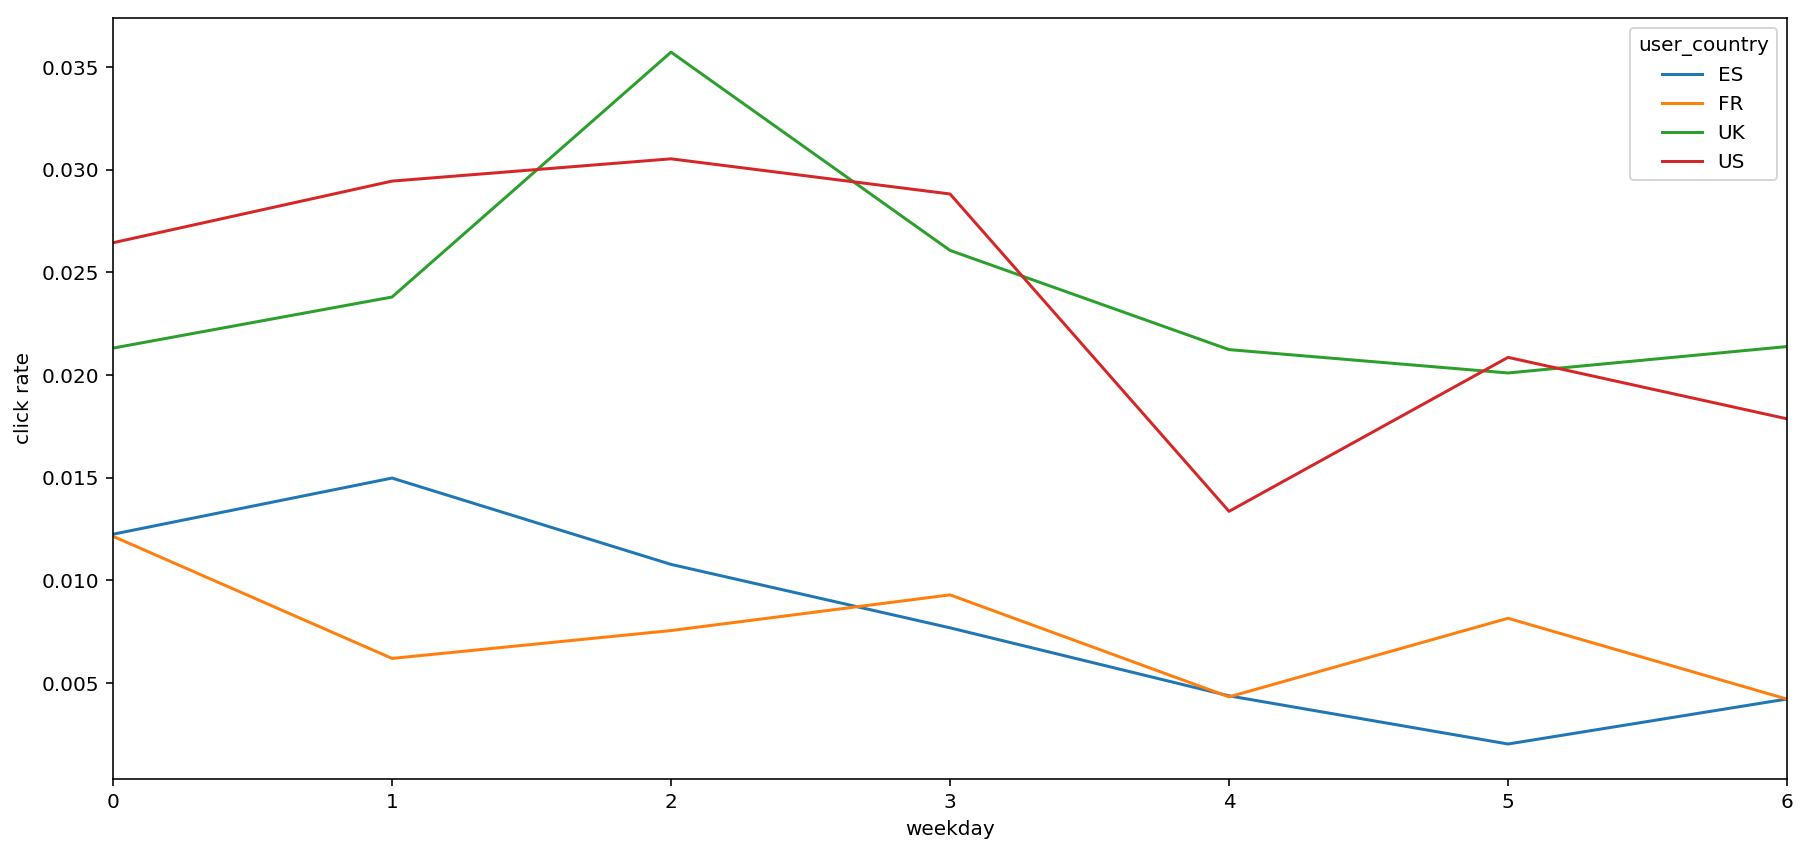

In [39]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('click rate')
# use unstack()
df.groupby(['weekday','user_country']).mean()['clicked'].unstack().plot(ax=ax)

#We observe seasonality in overall demand

In [37]:


days = {'Monday' : 0, 'Tuesday' : 1,'Wednesday' : 2,'Thursday' : 3,'Friday' : 4,'Saturday' : 5,'Sunday' : 6}

df.weekday = [days[item] for item in df.weekday] 
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,weekday2
0,8,short_email,generic,9,3,US,3,0,NaT
1,33,long_email,personalized,6,0,US,0,0,NaT
2,46,short_email,generic,14,1,US,3,0,NaT
3,49,long_email,personalized,11,3,US,10,0,NaT
4,65,short_email,generic,8,2,UK,3,0,NaT


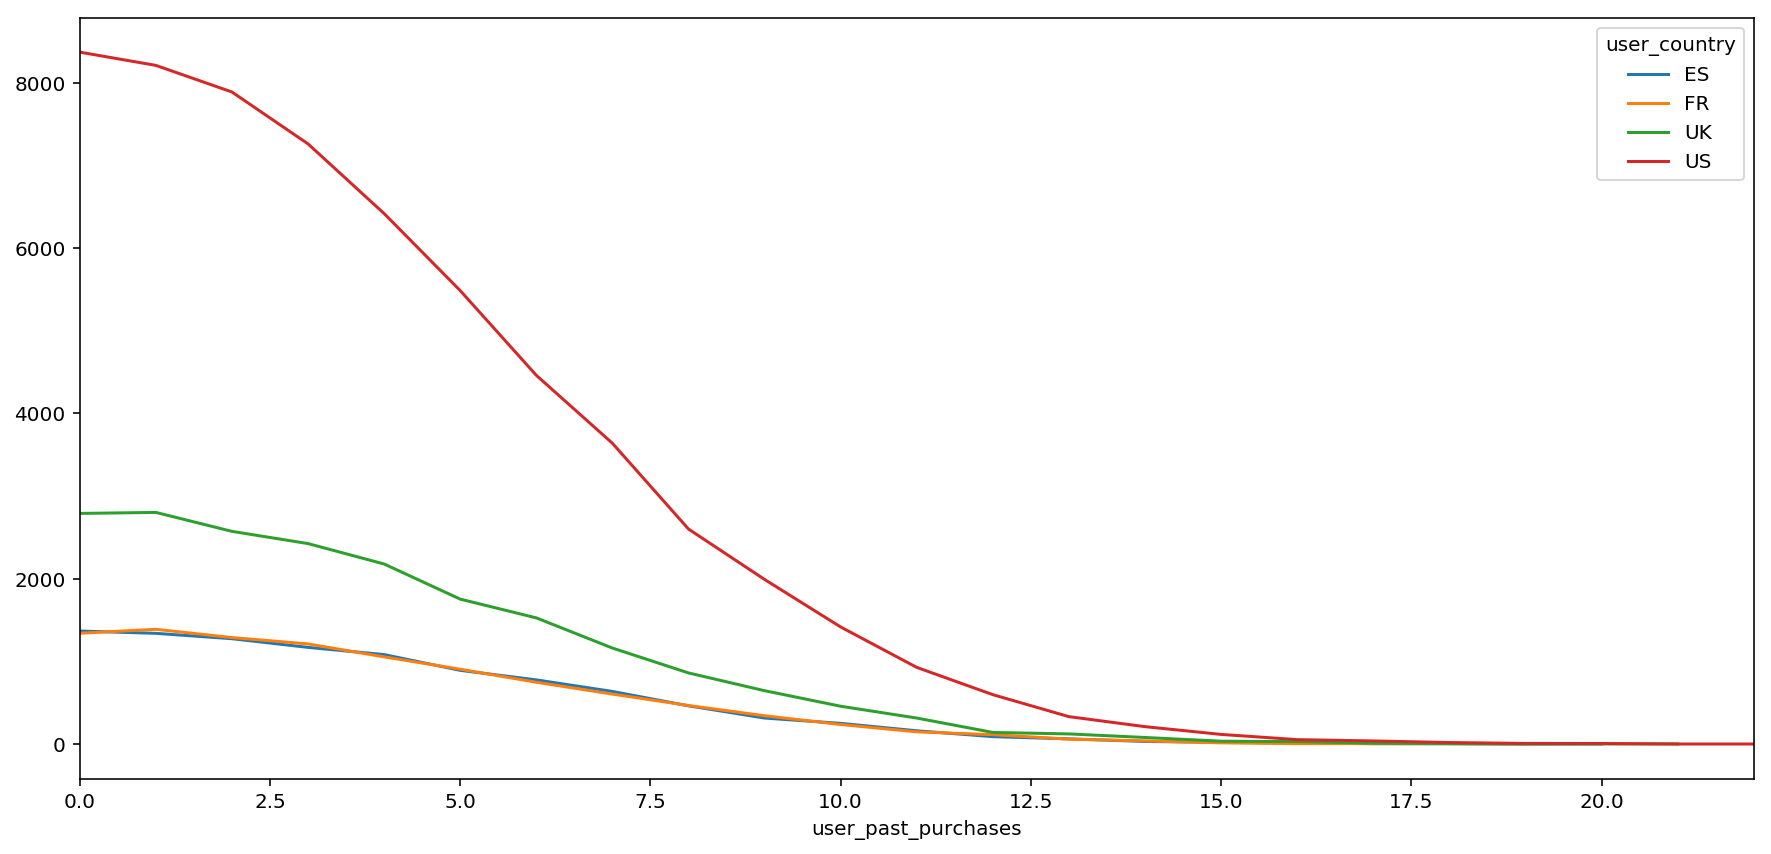

In [40]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['user_past_purchases','user_country']).count()['email_id'].unstack().plot(ax=ax)

#We observe seasonality in overall demand

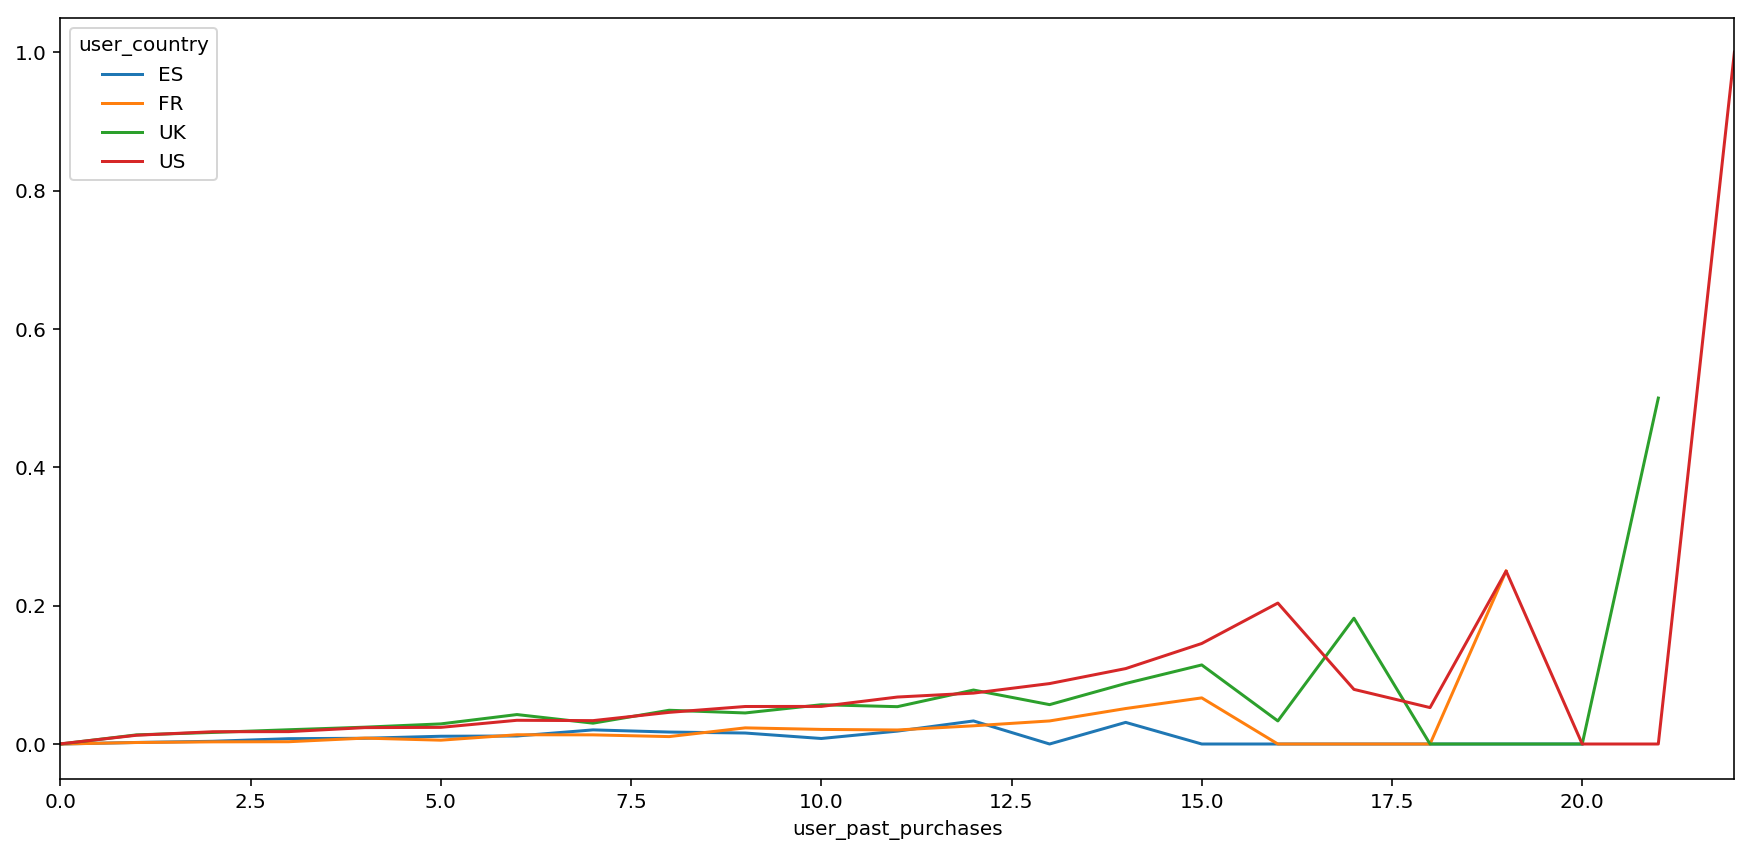

In [41]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['user_past_purchases','user_country']).mean()['clicked'].unstack().plot(ax=ax)

#We observe seasonality in overall demand

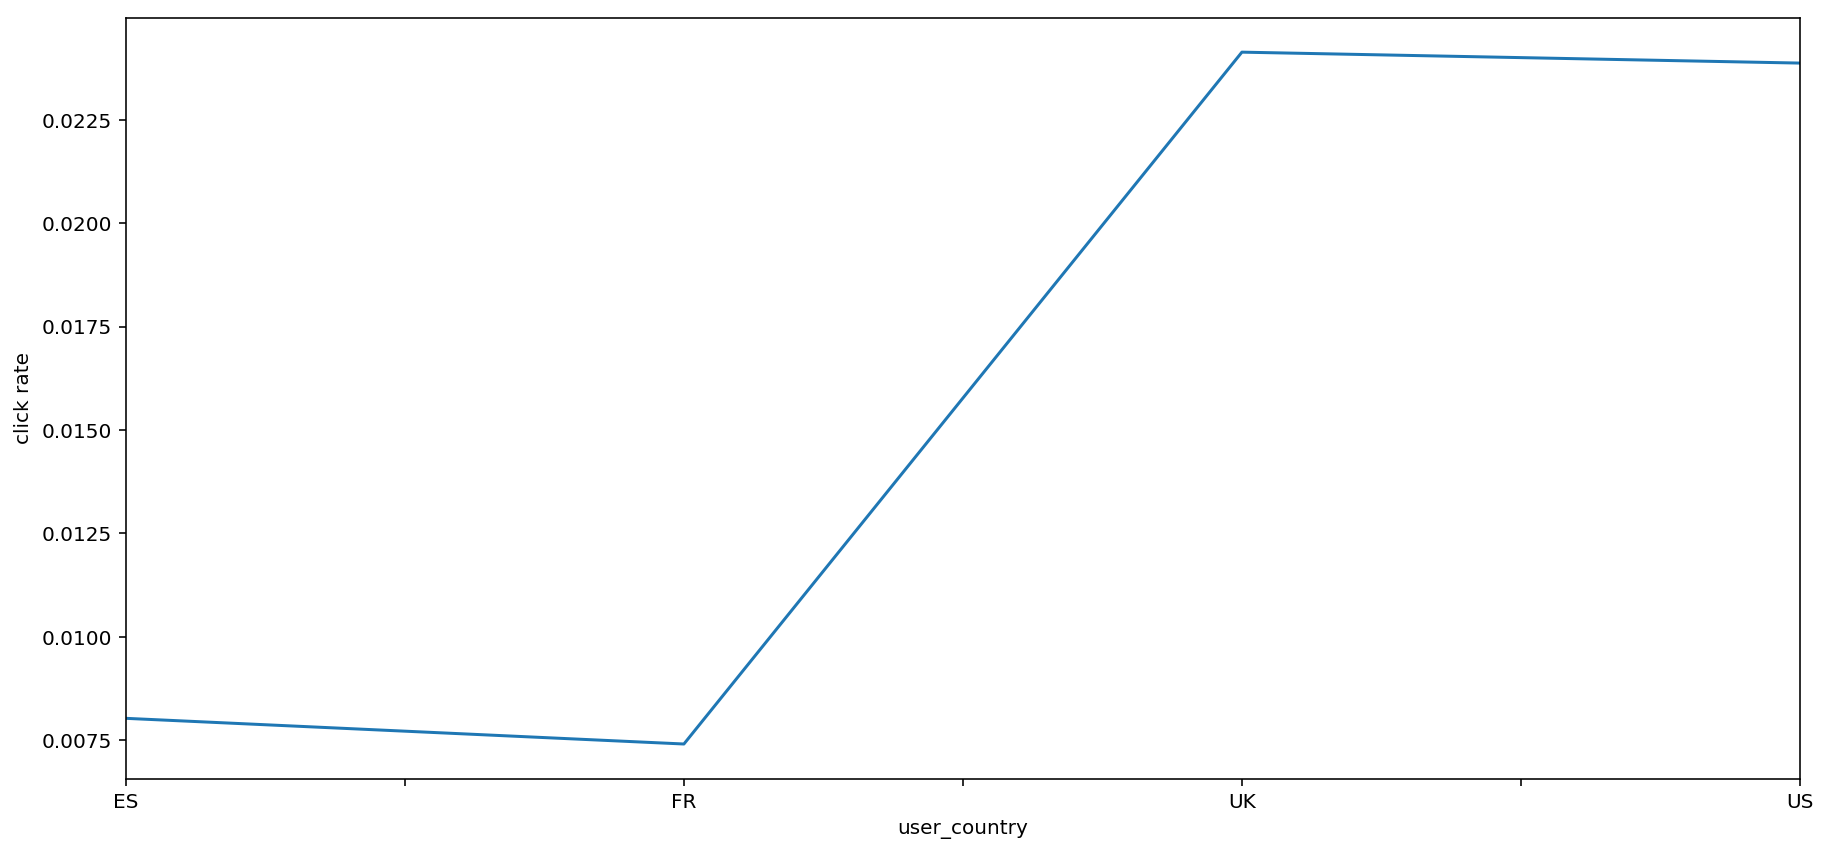

In [44]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('click rate')

# use unstack()
df.groupby(['user_country']).mean()['clicked'].plot(ax=ax)

#We observe seasonality in overall demand

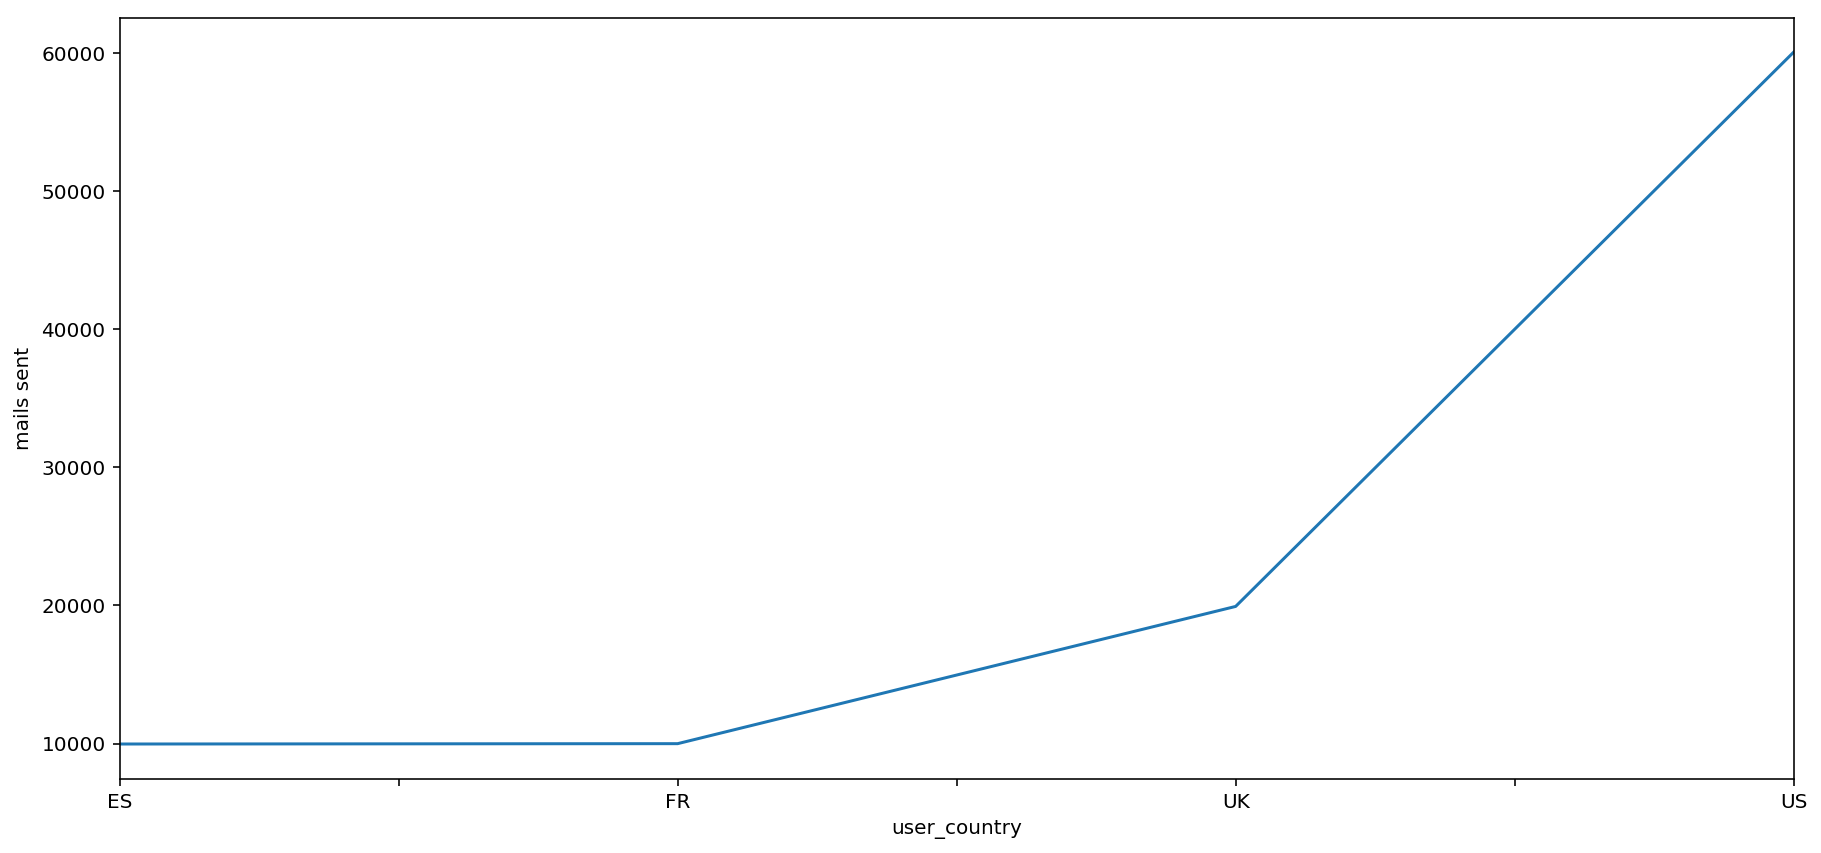

In [45]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('mails sent')

# use unstack()
df.groupby(['user_country']).count()['email_id'].plot(ax=ax)

#We observe seasonality in overall demand

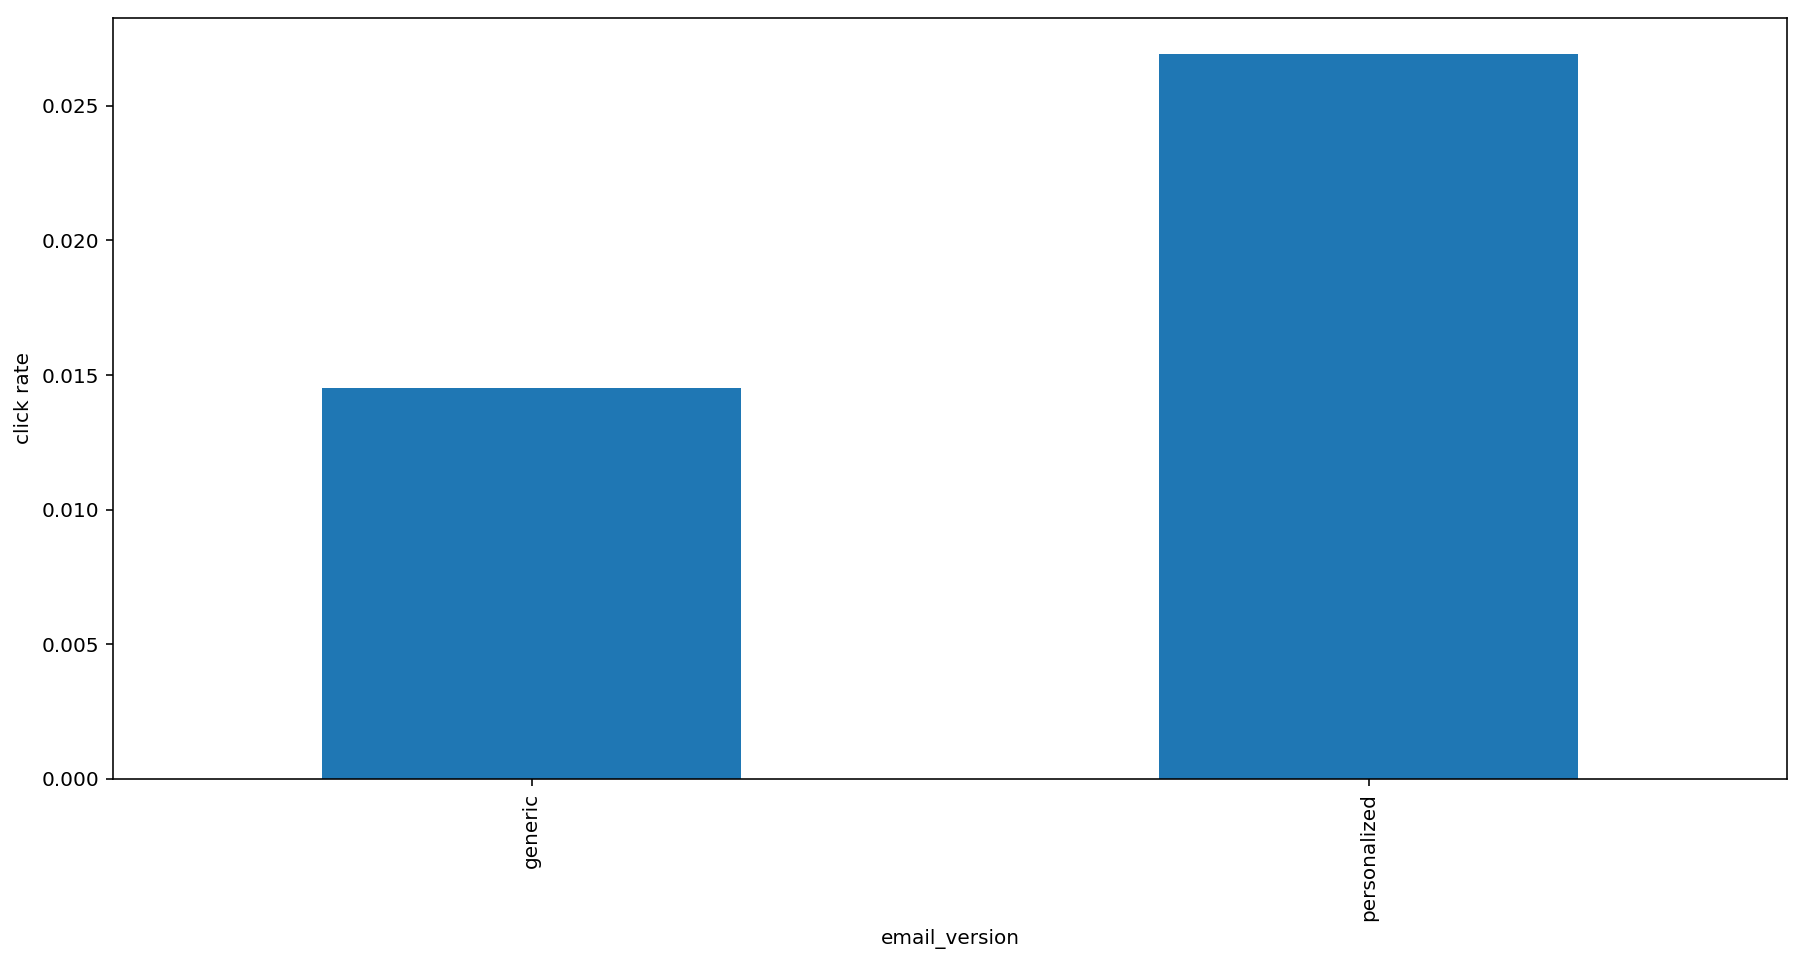

In [50]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('click rate')

# use unstack()
df.groupby(['email_version']).mean()['clicked'].plot.bar(ax=ax)

#We observe seasonality in overall demand

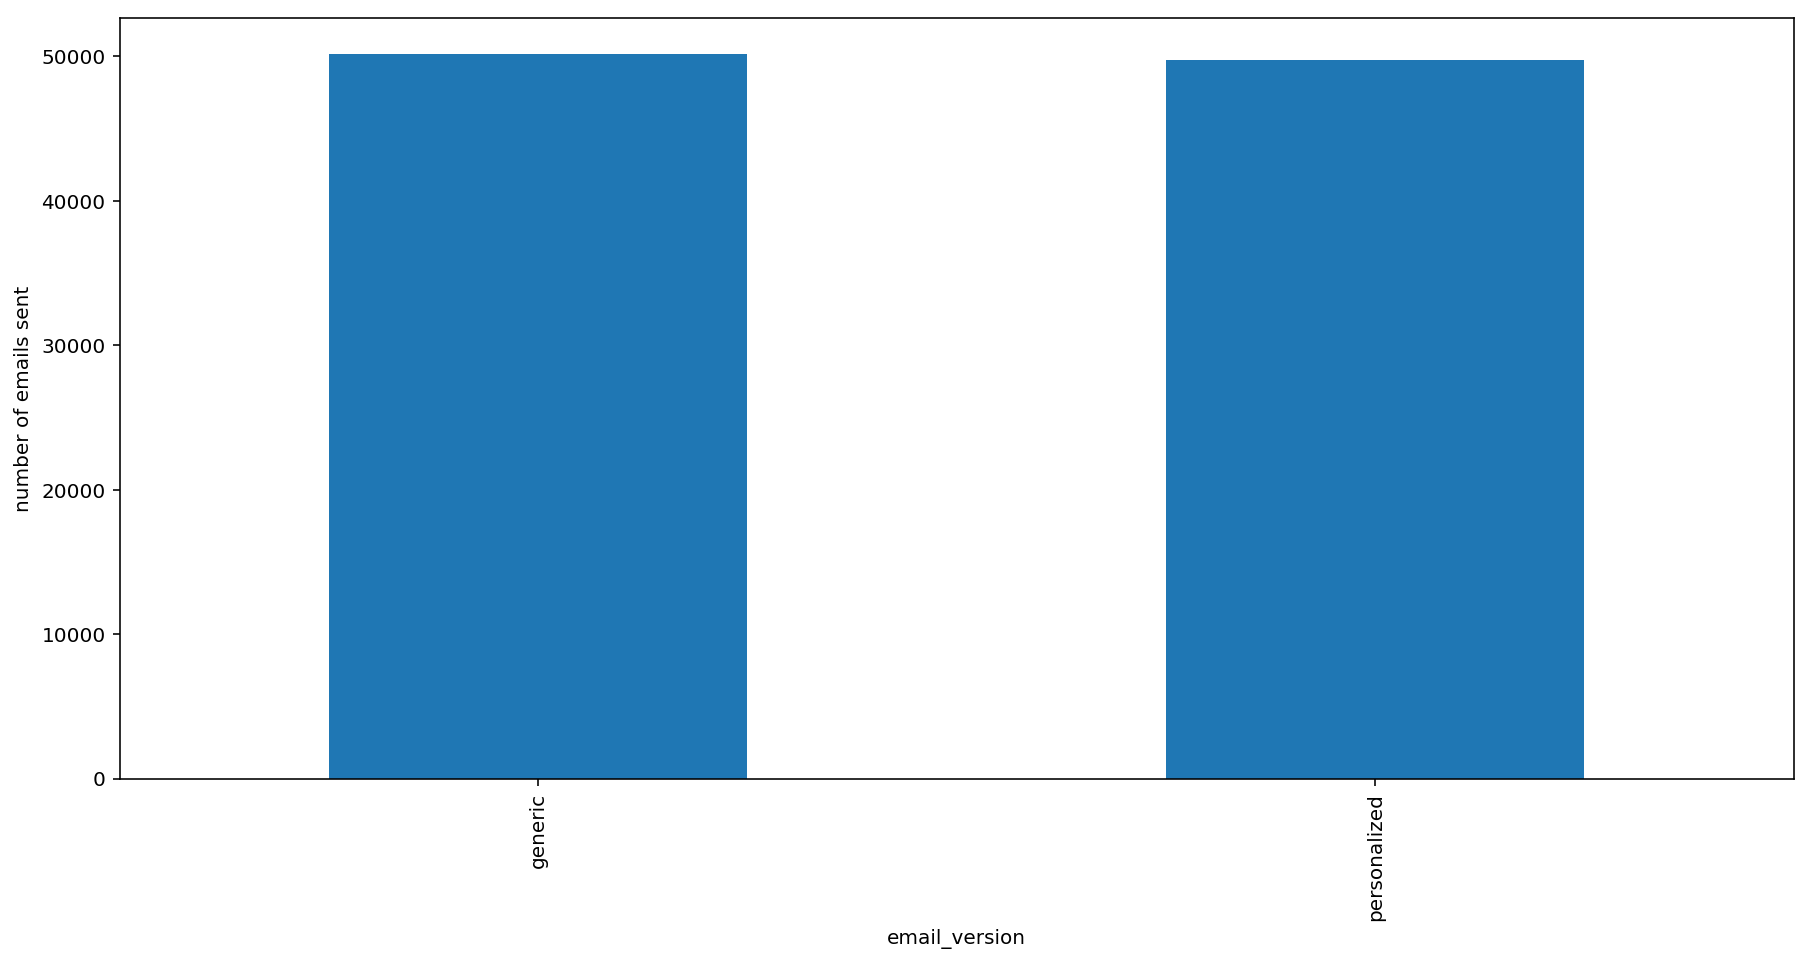

In [52]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('number of emails sent')

# use unstack()
df.groupby(['email_version']).count()['email_id'].plot.bar(ax=ax)

#We observe seasonality in overall demand

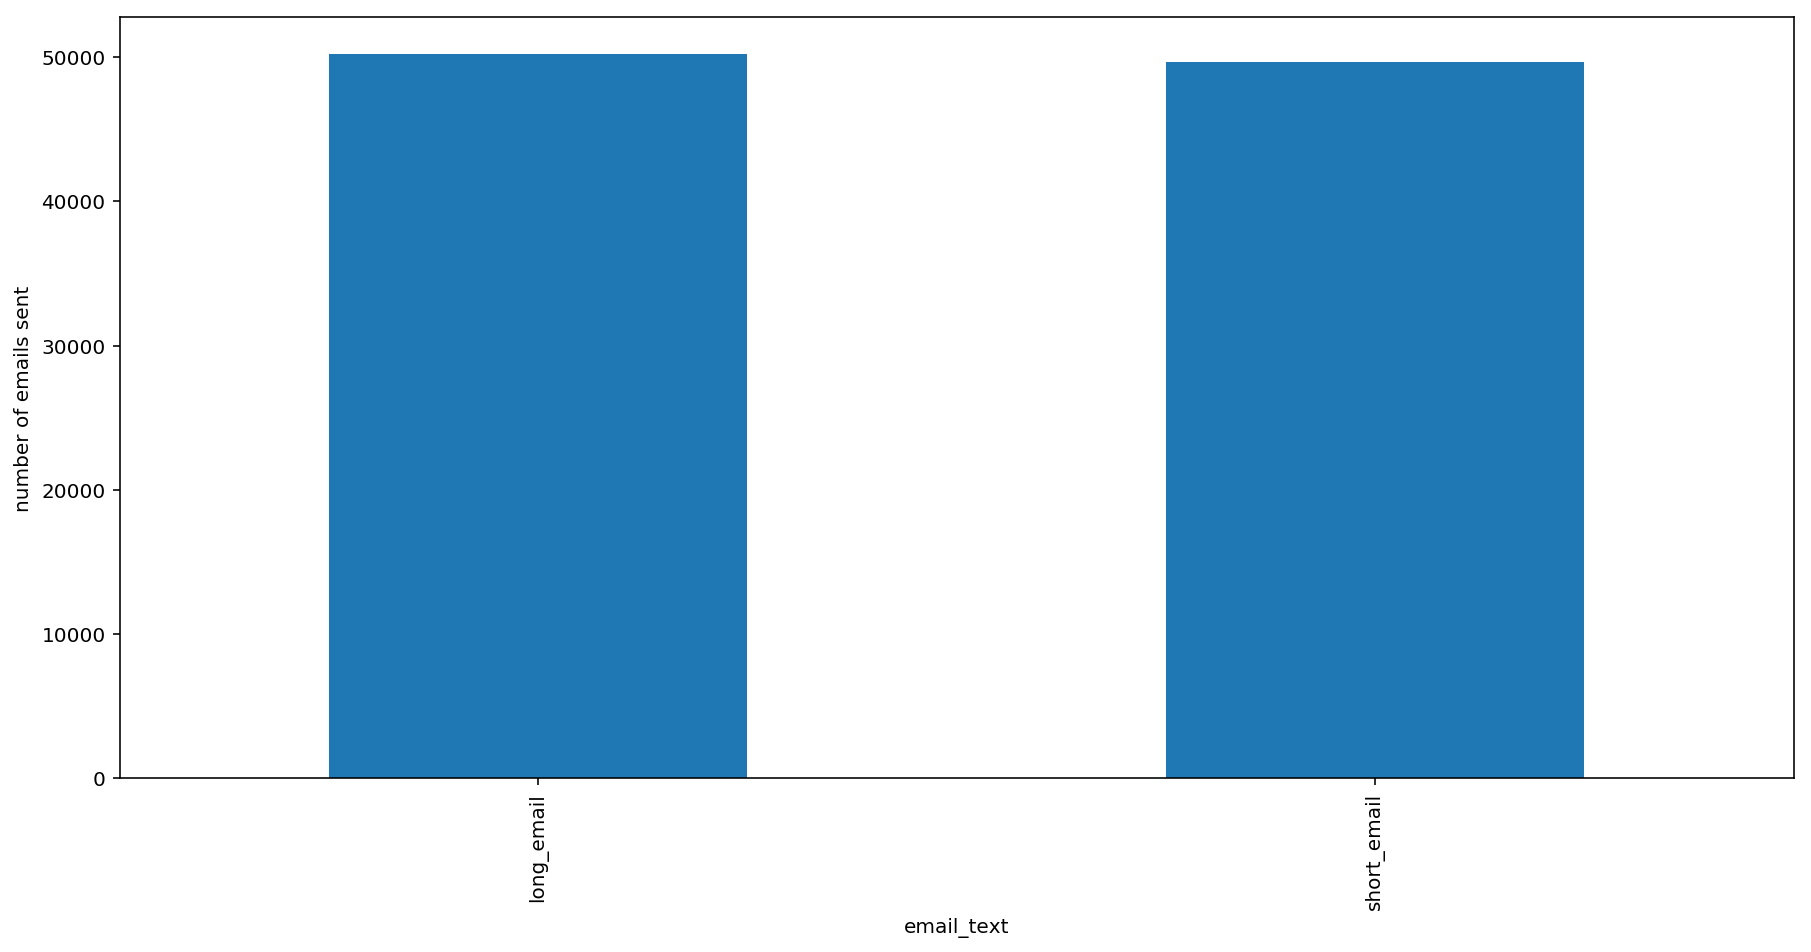

In [53]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('number of emails sent')

# use unstack()
df.groupby(['email_text']).count()['email_id'].plot.bar(ax=ax)

#We observe seasonality in overall demand

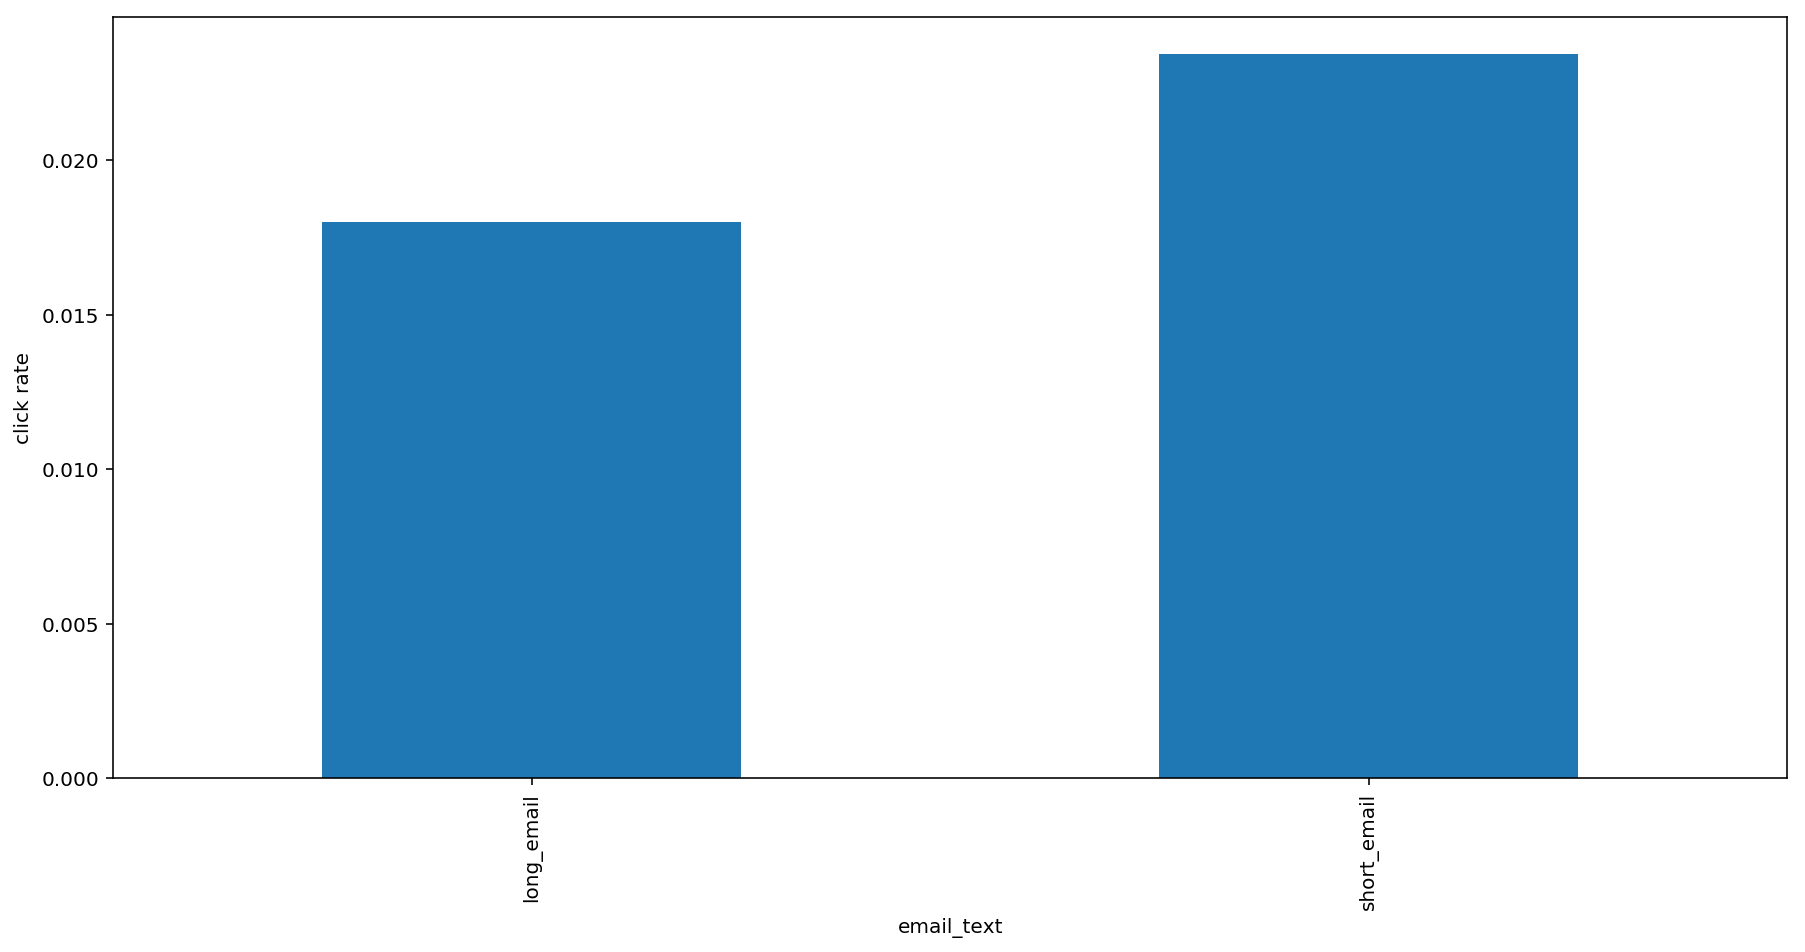

In [54]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('click rate')

# use unstack()
df.groupby(['email_text']).mean()['clicked'].plot.bar(ax=ax)

#We observe seasonality in overall demand